# Analytical expression to calculate the expected number of fair coin tosses until getting two consecutive heads

<br>
$\Large
P[heads]_i = \frac{F_i}{2 F_{i+2}}  \prod_{j=1}^{i-2} \frac{F_j + 2 F_{j+1}}{2 F_{j+2}} $
<br><br>
$\Large E[tosses] = \sum_{i=2}^{\infty} i  \frac{F_i}{2 F_{i+2}}  \prod_{j=1}^{i-2} \frac{F_j + 2 F_{j+1}}{2 F_{j+2}}  \\
$
<br>
where $F_i$ is a number from the Fibonacci sequence

In [1]:
from functools import reduce

In [2]:
fib = lambda n: reduce(lambda x,n:[x[1],x[0]+x[1]], range(n),[0,1])[0]

In [3]:
def product(i, n, func):
    result = 1.0
    for k in range(i,n+1):
        result *= func(k)
    return result

In [4]:
a = lambda x: fib(x) / fib(x+2)
b = lambda x: 0.5 * a(x) + fib(x+1) / fib(x+2)

In [5]:
H = lambda toss: 0.5 * a(toss-1) * product(i = 1, n = toss - 2, func = b) 

In [6]:
H(6)

0.078125

In [7]:
result = 0.0
for n in range(1,60):
    result += H(n) * n
    
print(result)

5.999720893302567


In [8]:
import numpy as np
import pandas as pd

In [9]:
tosses = np.arange(2,20)
pmf = np.vectorize(H)(tosses)

<AxesSubplot:>

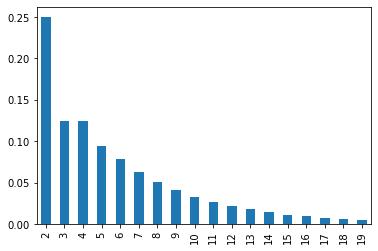

In [10]:
pd.DataFrame(data = {'pmf' : pmf}, index = tosses ).plot.bar(legend = None)